### This script contains the following:

#### 1. Importing your libraries 
#### 2. # Importing the  time series data set
#### Dataset link: https://www.kaggle.com/datasets/fireballbyedimyrnmom/us-counties-covid-19-dataset
#### 3. Subsetting, wrangling, and cleaning time-series data
#### 4. Creating Line Chart
#### 5. Time series analysis: decomposition
#### 6. Testing for stationarity
#### 7.,8. Stationarizing the dataset
#### 9. Autocorrelation
#### Bonus Task: Forecasting

## 1.. Importing your libraries and data¶

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

# Disable deprecation warnings
warnings.filterwarnings("ignore")

#Specifying styling option for plots
plt.style.use('fivethirtyeight')

### 1. Installed Quandl library and register for a Quandl account 

In [2]:
# Configuring my API key for assignment purposes

quandl.ApiConfig.api_key = 'ou9aShSQ-mK4-RS8-WyD'

### 2. Importing the  time series data set
#### Dataset link: https://www.kaggle.com/datasets/fireballbyedimyrnmom/us-counties-covid-19-dataset

In [3]:
# Importing the time series data set
# Dataset link: https://www.kaggle.com/datasets/fireballbyedimyrnmom/us-counties-covid-19-dataset

path = r'C:\Users\nikman\Desktop\CareerFoundry Project\Achievement 6\Tasks Achievement 6\Task 6.6'

In [4]:
# cHANGING data types for datetime column
data_types = {'date': 'datetime64'}

In [5]:
# To interpret the column named 'date' as dates rather than plain strings
parse_dates = ['date']

In [6]:
data_time = pd.read_csv(os.path.join(path, 'us-counties.csv'), index_col = False,  parse_dates=parse_dates)

In [7]:
data_time.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [8]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   county  object        
 2   state   object        
 3   fips    float64       
 4   cases   int64         
 5   deaths  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 114.6+ MB


In [9]:
data_time['date']

0         2020-01-21
1         2020-01-22
2         2020-01-23
3         2020-01-24
4         2020-01-24
             ...    
2502827   2022-05-13
2502828   2022-05-13
2502829   2022-05-13
2502830   2022-05-13
2502831   2022-05-13
Name: date, Length: 2502832, dtype: datetime64[ns]

### 3. wrangling, and cleaning time-series data

In [10]:
# Renaming columns
data_time.rename(columns = {'state': 'State','fips': 'Code for counties', 'deaths':'Total count of deaths due to covid', 'cases':'Total number of Covid cases'}, inplace = True)

In [11]:
data_time.columns

Index(['date', 'county', 'State', 'Code for counties',
       'Total number of Covid cases', 'Total count of deaths due to covid'],
      dtype='object')

In [12]:
#Dropping columns that may not be essential

data_time_2 = data_time.drop(columns = ['Code for counties']) 

In [13]:
data_time_2.head()

,date,county,State,Total number of Covid cases,Total count of deaths due to covid
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0


In [14]:
#check for mixed data type
for col in data_time_2.columns.tolist():
  weird = (data_time_2[[col]].map(type) != data_time_2[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (data_time_2[weird]) > 0:
    print (col)
else :
    print ("None of the columns have mix data")


None of the columns have mix data


In [15]:
#checking for missing values

data_time_2.isnull().sum()

date                                      0
county                                    0
State                                     0
Total number of Covid cases               0
Total count of deaths due to covid    57605
dtype: int64

In [16]:
#Check for duplicates

dup_time = data_time_2.duplicated()
dup_time.shape

(2502832,)

### No duplicate values

## Average of Total number of Covid Cases

In [17]:
#averaging Total number of Covid Cases
avg_total_cases = data_time_2.groupby('date')['Total number of Covid cases'].mean()

In [18]:
#checking output
avg_total_cases

date
2020-01-21        1.000000
2020-01-22        1.000000
2020-01-23        1.000000
2020-01-24        1.000000
2020-01-25        1.000000
                  ...     
2022-05-09    25142.926620
2022-05-10    25163.881215
2022-05-11    25213.462247
2022-05-12    25248.869552
2022-05-13    25281.490178
Name: Total number of Covid cases, Length: 844, dtype: float64

In [19]:
# Reset the index of avg_total_cases to make it a DataFrame
avg_total_cases_df = avg_total_cases.reset_index()
avg_total_cases_df.head()

,date,Total number of Covid cases
0,2020-01-21,1.0
1,2020-01-22,1.0
2,2020-01-23,1.0
3,2020-01-24,1.0
4,2020-01-25,1.0


In [20]:
# Merge avg_total_cases_df with data_time_2 on the 'date' column
data_time_2 = pd.merge(data_time_2, avg_total_cases_df, on='date', suffixes=('', '_avg'))


In [21]:
data_time_2.head()

,date,county,State,Total number of Covid cases,Total count of deaths due to covid,Total number of Covid cases_avg
0,2020-01-21,Snohomish,Washington,1,0.0,1.0
1,2020-01-22,Snohomish,Washington,1,0.0,1.0
2,2020-01-23,Snohomish,Washington,1,0.0,1.0
3,2020-01-24,Cook,Illinois,1,0.0,1.0
4,2020-01-24,Snohomish,Washington,1,0.0,1.0


In [22]:
data_time_2.dtypes


date                                  datetime64[ns]
county                                        object
State                                         object
Total number of Covid cases                    int64
Total count of deaths due to covid           float64
Total number of Covid cases_avg              float64
dtype: object

In [23]:
data_time_2['Total number of Covid cases']

0              1
1              1
2              1
3              1
4              1
           ...  
2502827    11088
2502828    10074
2502829     5643
2502830     2358
2502831     1588
Name: Total number of Covid cases, Length: 2502832, dtype: int64

In [24]:
#data_sub = data_time_2[['date','Total number of Covid cases','Total number of Covid cases_avg']]
data_sub = data_time_2[['date','Total number of Covid cases']]
data_sub

,date,Total number of Covid cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,1
4,2020-01-24,1
...,...,...
2502827,2022-05-13,11088
2502828,2022-05-13,10074
2502829,2022-05-13,5643
2502830,2022-05-13,2358


### 4. Line Chart
 - Creating subset by sampling
 - Downsampling by 10 points
 - Smoothening with Moving Average
 - Creating Line Chart from data_sub

In [25]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Total number of Covid cases
datetime,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-24,1


### Creating smaller sample

In [26]:
#Setting the seed to achieve reproducable pattern
np.random.seed(4)

#creating subset with all boolean True for all values <= 0.8
sample = np.random.rand(len(data_sub)) <= 0.8


In [27]:
#Create subsets with all True: <= 0.8: 80% of sample
big_sample= data_sub[sample]

#Create subsets with all False: > 0.8: 20% of sample
small_sample = data_sub[~sample]

### Checking len of small and bid sample

In [28]:
len(data_sub) == len(big_sample) + len(small_sample)

True

### Downsampling subset

In [29]:
# Downsampling the subsets
downsampled_big_sample = big_sample.iloc[::10]  # Select every 10th data point
downsampled_small_sample = small_sample.iloc[::10]  # Select every 10th data point



In [30]:
downsampled_small_sample

,Total number of Covid cases
datetime,
2020-01-21,1
2020-02-03,1
2020-02-08,1
2020-02-13,1
2020-02-16,2
...,...
2022-05-13,6928
2022-05-13,23312
2022-05-13,4202


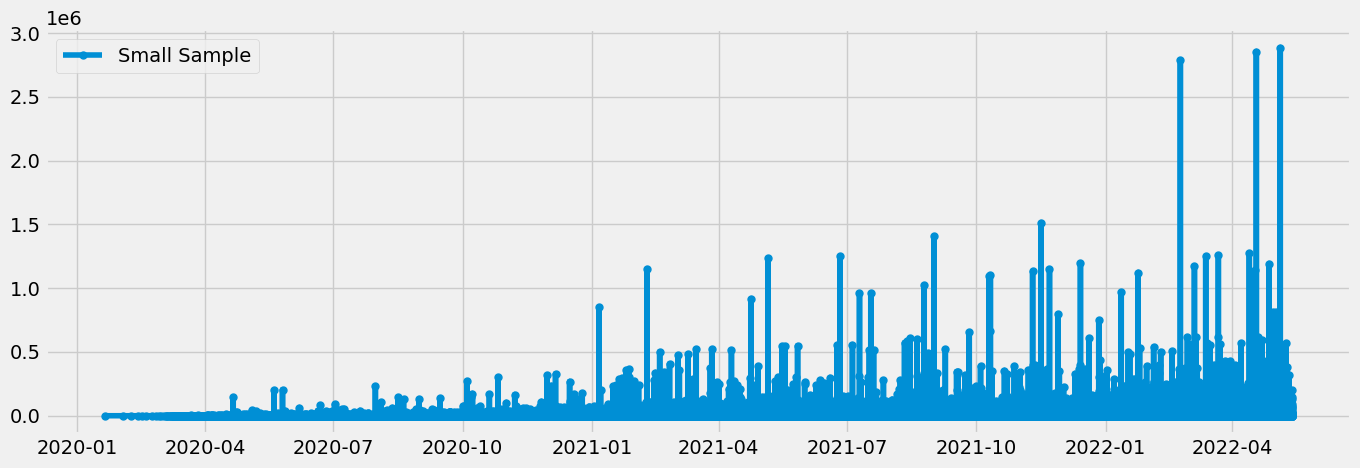

In [31]:
# Plot the downsampled data using matplotlib
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(downsampled_small_sample, label='Small Sample',marker='o', markersize=5)
plt.legend()
plt.show()


### Even after creating a subset of 20% of sample and downsampling by 10 points the grph is too crowded to read.

### Smoothenind data with MA

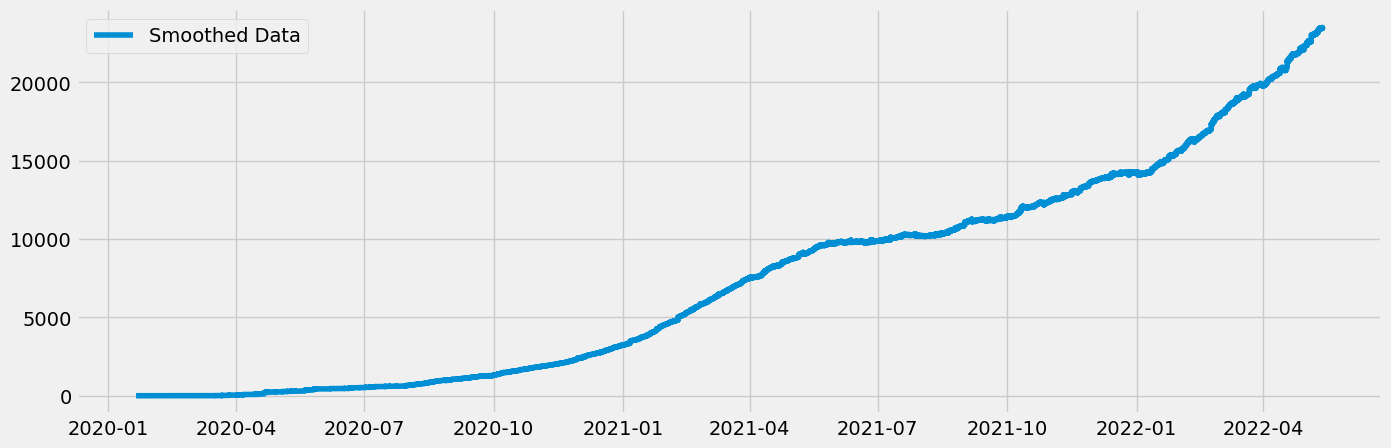

In [32]:
# Apply a moving average to smooth the data

window_size = 8000
smoothed_data = downsampled_small_sample['Total number of Covid cases'].rolling(window=window_size, min_periods=1).mean()

# Plot the smoothed data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(downsampled_small_sample.index, smoothed_data, label='Smoothed Data')
plt.legend()
plt.show()


#### This graph is more readable

### Converting smoothed_data to dataframe
### Adding index header and header to first column

In [33]:
# Assuming smoothed_data is a pandas Series
smoothed_data = smoothed_data.to_frame()  # Convert Series to DataFrame

# Set index to datetime
smoothed_data.index = pd.to_datetime(downsampled_small_sample.index)

# Add header to the DataFrame
smoothed_data.columns = ["Total number of Covid cases"]

smoothed_data


,Total number of Covid cases
datetime,
2020-01-21,1.000000
2020-02-03,1.000000
2020-02-08,1.000000
2020-02-13,1.000000
2020-02-16,1.200000
...,...
2022-05-13,23489.911000
2022-05-13,23492.549875
2022-05-13,23484.899125


### Creating subset of data with date range

In [34]:
# Define the start and end dates
start_date = '2020-01-21'
end_date = '2022-05-12'

# Filter the DataFrame based on the date range
data_sub = smoothed_data[start_date:end_date]


In [35]:
data_sub.shape

(50035, 1)

In [36]:
data_sub

,Total number of Covid cases
datetime,
2020-01-21,1.000000
2020-02-03,1.000000
2020-02-08,1.000000
2020-02-13,1.000000
2020-02-16,1.200000
...,...
2022-05-12,23453.403125
2022-05-12,23453.686250
2022-05-12,23444.666625


### Resample data to monthly frequency

In [37]:
# Resample to monthly frequency and aggregate using average
monthly_data = data_sub.resample('M').mean()

monthly_data

,Total number of Covid cases
datetime,
2020-01-31,1.000000
2020-02-29,1.635119
2020-03-31,24.632936
2020-04-30,131.296844
2020-05-31,324.142490
2020-06-30,471.171828
2020-07-31,589.078308
2020-08-31,838.373474
2020-09-30,1168.684782


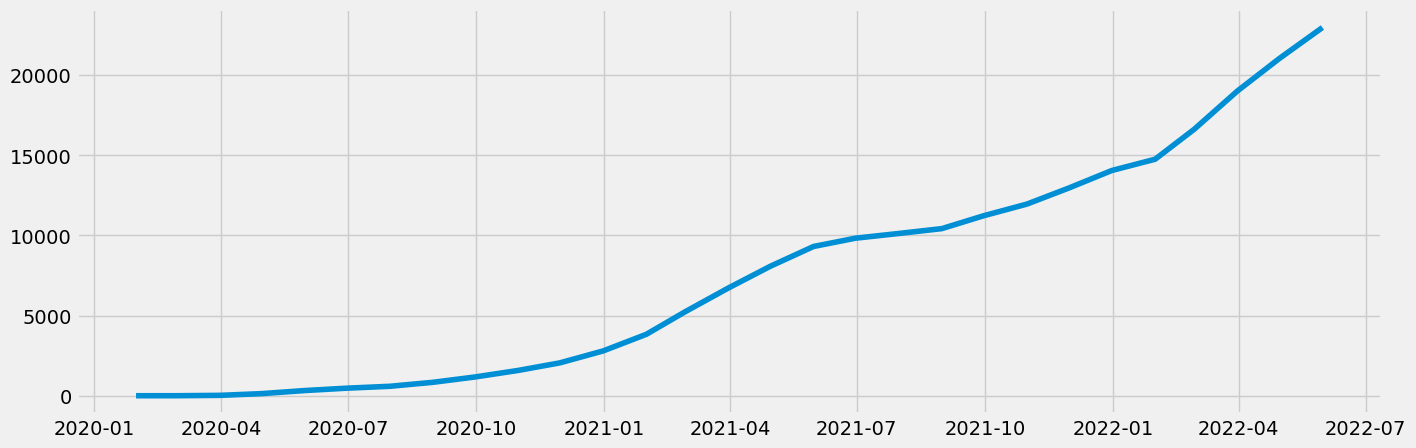

In [38]:
#Plot the data using matplotlib

plt.figure(figsize=(15,5), dpi = 100)
plt.plot(monthly_data)
plt.savefig('covid_cases.png')

## 5.Time series analysis - decomposition

In [39]:
decomposition = sm.tsa.seasonal_decompose(monthly_data, model='additive')

In [40]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [41]:
from pylab import rcParams # To define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

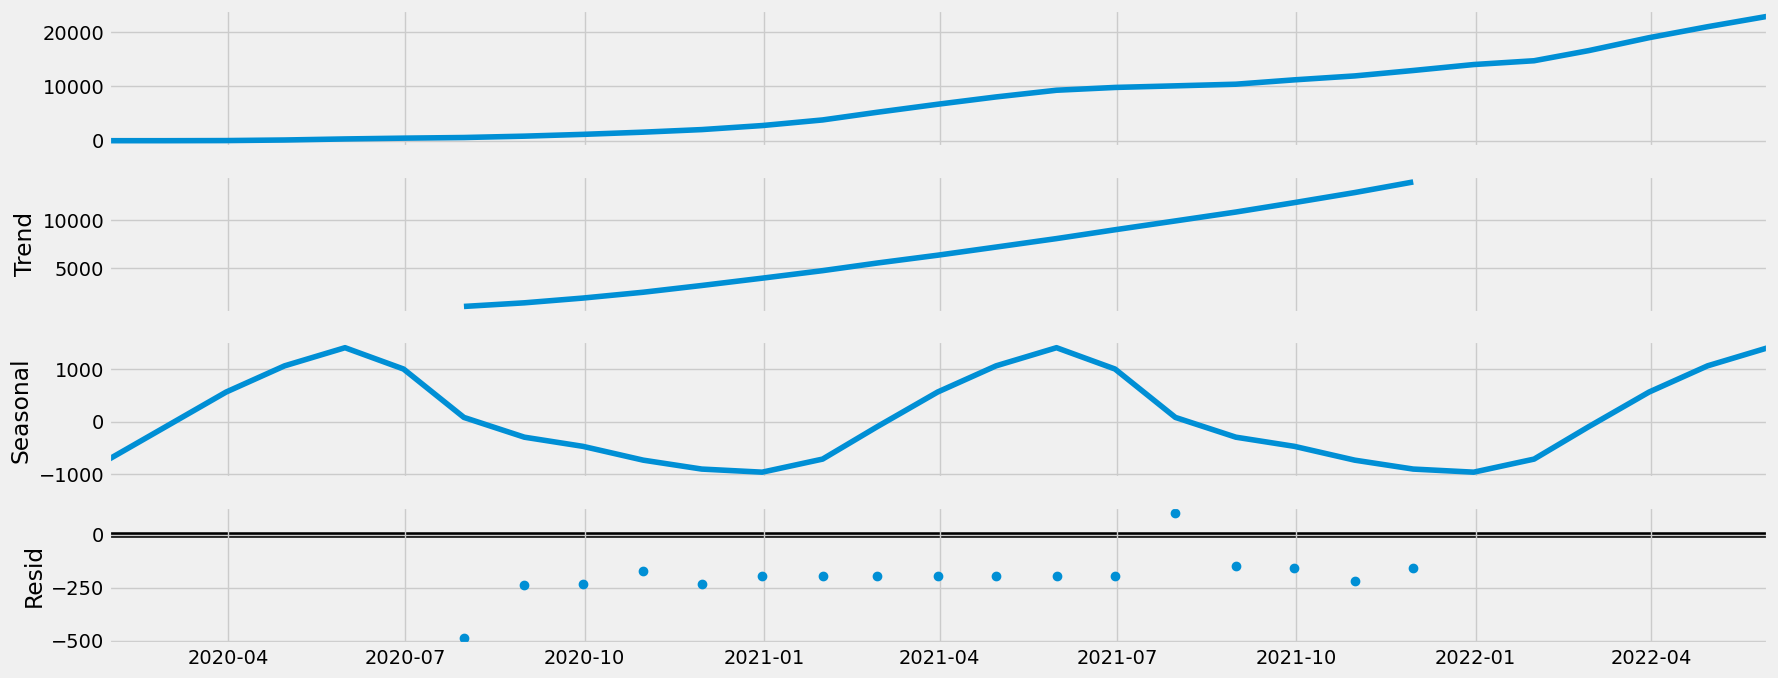

In [42]:
# Plot the separate components

decomposition.plot()
plt.savefig('covid_cases_decomposition.png')
plt.show()

### 5. Analyzing Results of Decomposition

- Trend: There's an upward trend in the number of COVID cases observed from August 2020 to December 2021. This sustained increase can be identified as the dominant trend in the data.

- Seasonality: Seasonal fluctuations are evident, particularly peaking during the months of April and July both years.

- Noise/Residual: Between August 2020 and December 2021, there's noticeable noise in the data, with a notable spike in noise observed around August to September 2021.

### 6.Dickey-Fuller test to check for stationarity

In [43]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# define a function that prints the correct output from that array
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(monthly_data)

Dickey-Fuller Stationarity test:
Test Statistic                  0.907906
p-value                         0.993193
Number of Lags Used             9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


### 6.Interpreting the Results and Referencing the Null Hypothesis

  - Hypothesis: How does BMI correlate with the likelihood of heart disease, and do additional factors such as had Covid infection mediate or moderate this relationship?

- p-value: With a calculated p-value of 0.993, HIGHER than the significance level of 0.05, the result is not significant. This suggests a 99% probability that our null hypothesis could be true, leading to the conclusion that the observed data does not provide enough evidence to reject the null hypothesis.

- Critical Value: Our test statistic is higher than all critical values, reinforcing the conclusion that the null hypothesis cannot be rejected based on the significance level chosen for the hypothesis test.

### 7.Non stationary data: conduct a round of differencing on it and repeat step 6

In [44]:
data_diff = monthly_data - monthly_data.shift(1)

In [45]:
data_diff.dropna(inplace = True)

In [46]:
data_diff.isnull().sum()

Total number of Covid cases    0
dtype: int64

In [47]:
data_diff.head()

,Total number of Covid cases
datetime,
2020-02-29,0.635119
2020-03-31,22.997817
2020-04-30,106.663908
2020-05-31,192.845646
2020-06-30,147.029337


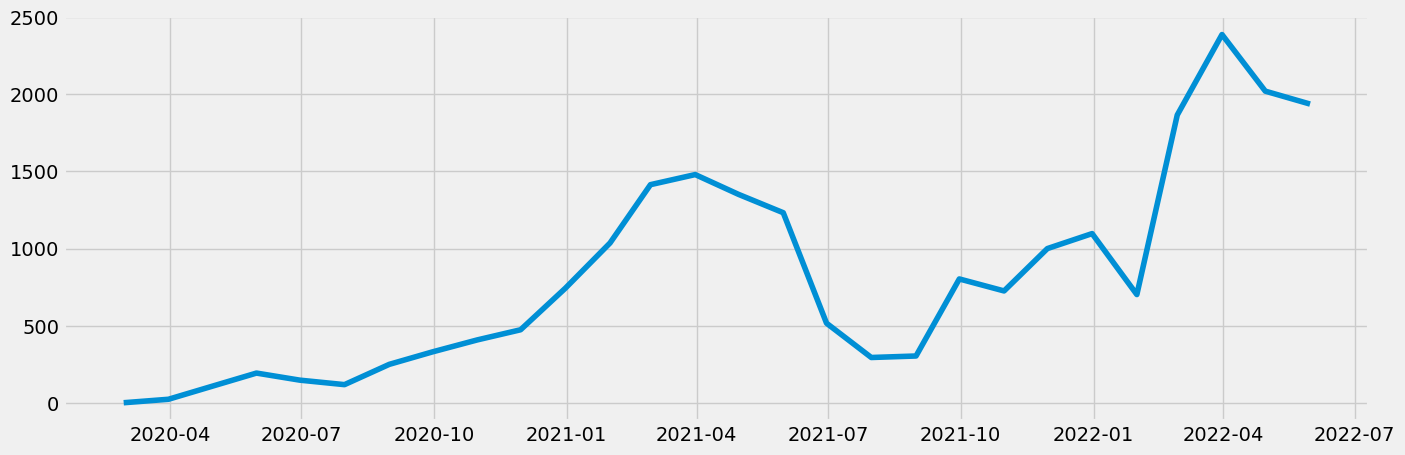

In [48]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [49]:
# Apply the test using the function on the time series
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.256156
p-value                         0.648985
Number of Lags Used             8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


### 7.Interpreting the Results and Referencing the Null Hypothesis

  - Hypothesis: How does BMI correlate with the likelihood of heart disease, and do additional factors such as had Covid infection mediate or moderate this relationship?

- p-value: With a calculated p-value of 0.648, HIGHER than the significance level of 0.05, the result is not significant. This suggests a 65% probability that our null hypothesis could be true, leading to the conclusion that the observed data does not provide enough evidence to reject the null hypothesis.

- Critical Value: Our test statistic(-1.25) is higher than all critical values, reinforcing the conclusion that the null hypothesis cannot be rejected based on the significance level chosen for the hypothesis test.

### 8.Non stationary data: conduct another round of differencing on it and repeat step 6, with larger lag

In [50]:
data_diff_3 = monthly_data - monthly_data.shift(3)

In [51]:
data_diff_3.dropna(inplace = True)

In [52]:
data_diff_3.isnull().sum()

Total number of Covid cases    0
dtype: int64

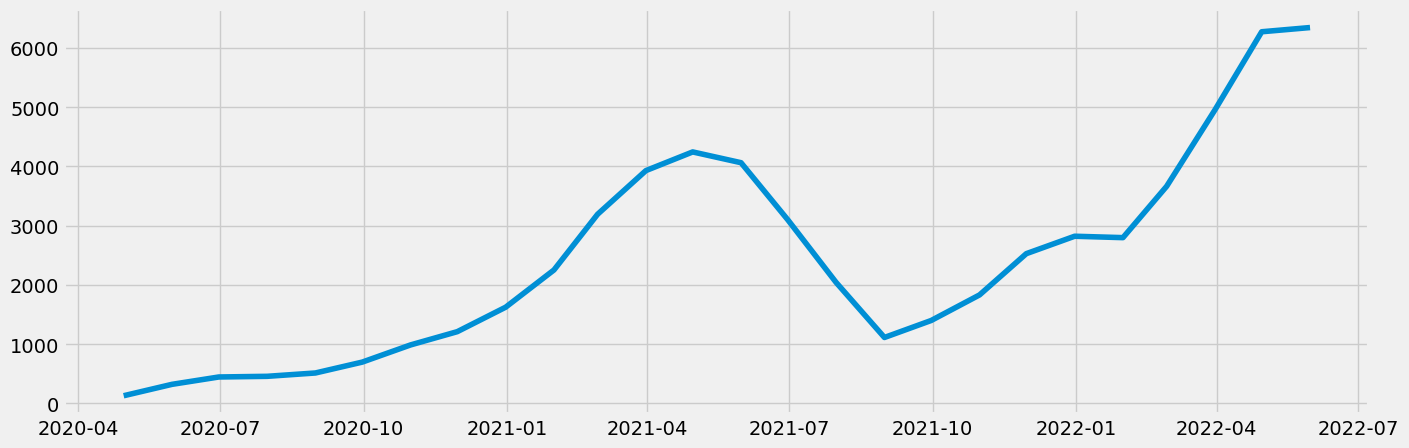

In [53]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_3)

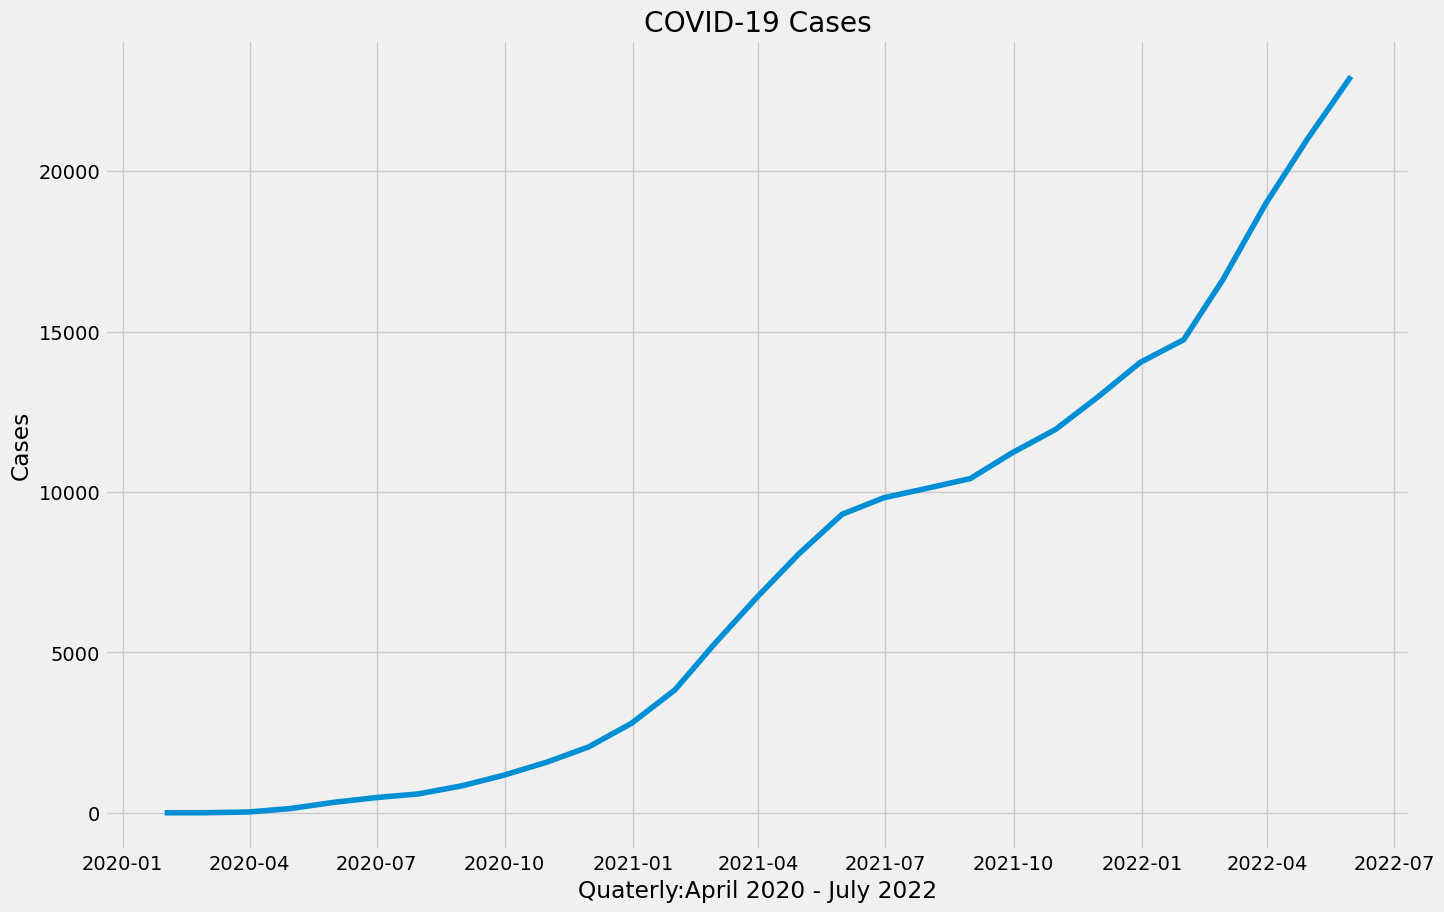

In [54]:
import matplotlib.pyplot as plt

# Assuming you already have monthly_data defined

plt.figure(figsize=(15, 10), dpi=100)
plt.plot(monthly_data)
plt.xlabel('Quaterly:April 2020 - July 2022')
plt.ylabel('Cases')
plt.title('COVID-19 Cases')
plt.savefig('covid_cases.png')  # You can change the file name and extension as needed
plt.show()


In [55]:
# Apply the test using the function on the time series
dickey_fuller(data_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.997068
p-value                         0.035169
Number of Lags Used             9.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


### 8.Interpreting the Results and Referencing the Null Hypothesis

  - Hypothesis: How does BMI correlate with the likelihood of heart disease, and do additional factors such as had Covid infection mediate or moderate this relationship?

- p-value: With a calculated p-value of 0.035, LESS than the the significance level of 0.05, the result is significant. This suggests a 4% probability that our null hypothesis could be true, leading to the conclusion that the observed data does provide enough evidence to reject the null hypothesis.

- Critical Value: Our test statistic(-2.99) is LESSER than critical values of 10% it is still higher than critical values of 5% and 1% indicating that  we cannot reject the null hypothesis at the 5% and 1% significance level but we can reject it at the 10% significance levels.

### 9. Check your data’s autocorrelations

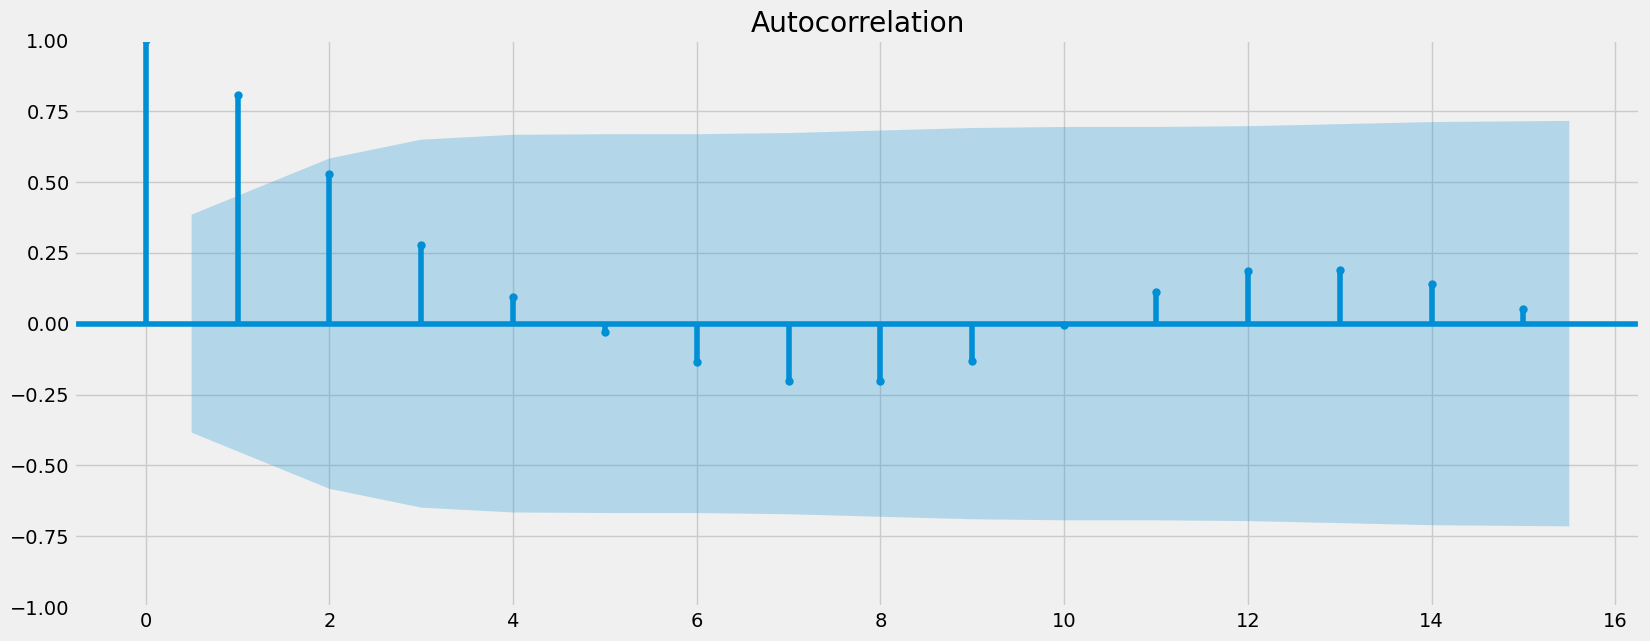

In [56]:
# Check out a plot of autocorrelations
# Import the autocorrelation and partial correlation plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff_3)
plt.show()

### Interpretation of Autocorrelation plot
- We notice one lag completely outside the confidence interval which indicates a significant correlation between the lags and one lag half outside the confidence interval which indicates a moderate correlation between the lags

- With a few lags outside the confidence interval and strong correlations between the lags could suggest issues with stationarity. Thus results from the Dickey-Fuller test should be taken into account

- Overall, these observations suggest the presence of significant autocorrelation in the time series data, with certain lags showing stronger relationships than others

- From Dickey-Fuller test suggests that while the data may not be stationary at higher confidence levels (1% and 5%), there is evidence to suggest it may be stationary at a 10% significance level.

### Bonus Task: Forecasting with ARIMA model

#### 1. Defining parameters

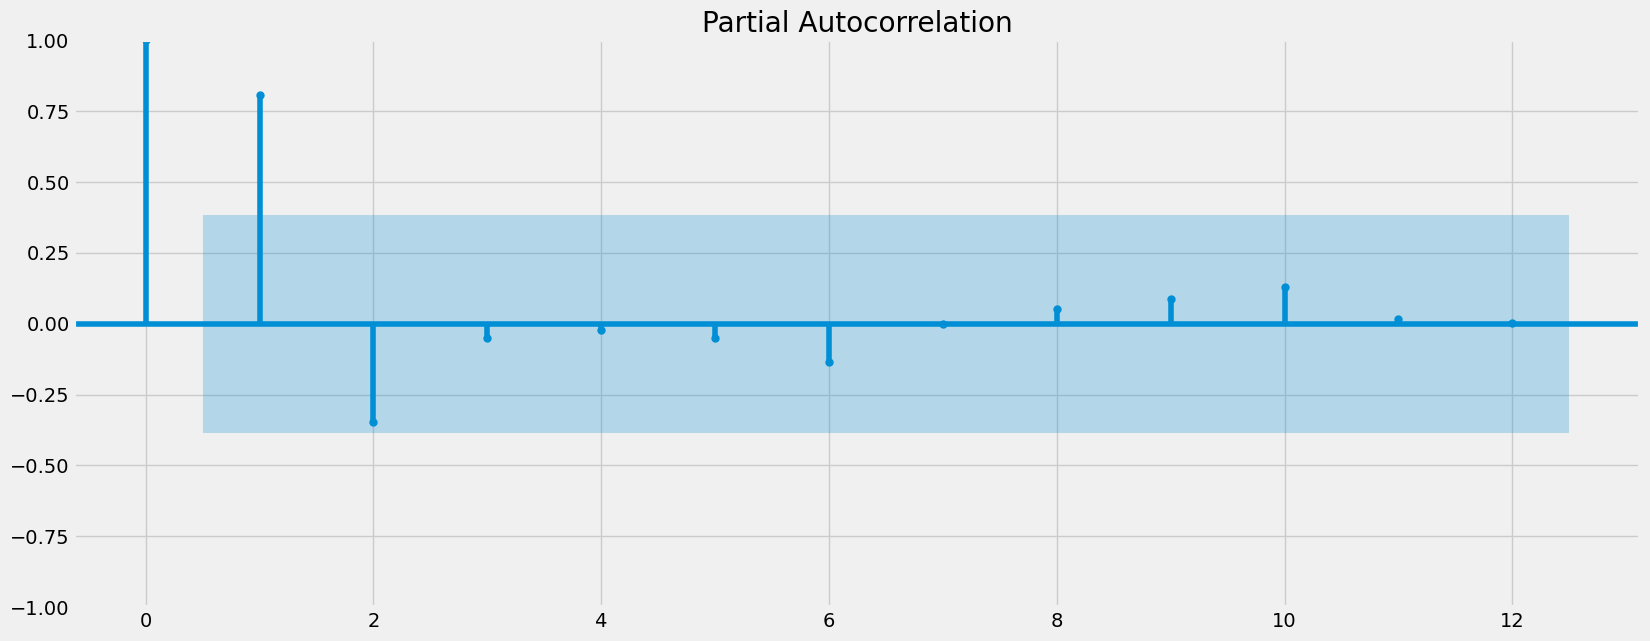

<Figure size 4500x4500 with 0 Axes>

In [57]:
# Determine the maximum number of lags based on the sample size
max_lags = min(int(0.5 * len(data_diff_3)), 12)  # Set maximum lags to 50% of the sample size or 12, whichever is smaller

# Plot partial autocorrelations to determine parameter p
plot_pacf(data_diff_3, lags=max_lags)
plt.figure(figsize=(15, 15), dpi=300)
plt.show()


#### In the figure above, you can see that some are  highly positive bars. These indicate significant correlations. Let’s start by picking 1 AR terms to compensate for the  partial autocorrelations. This makes p = 1.

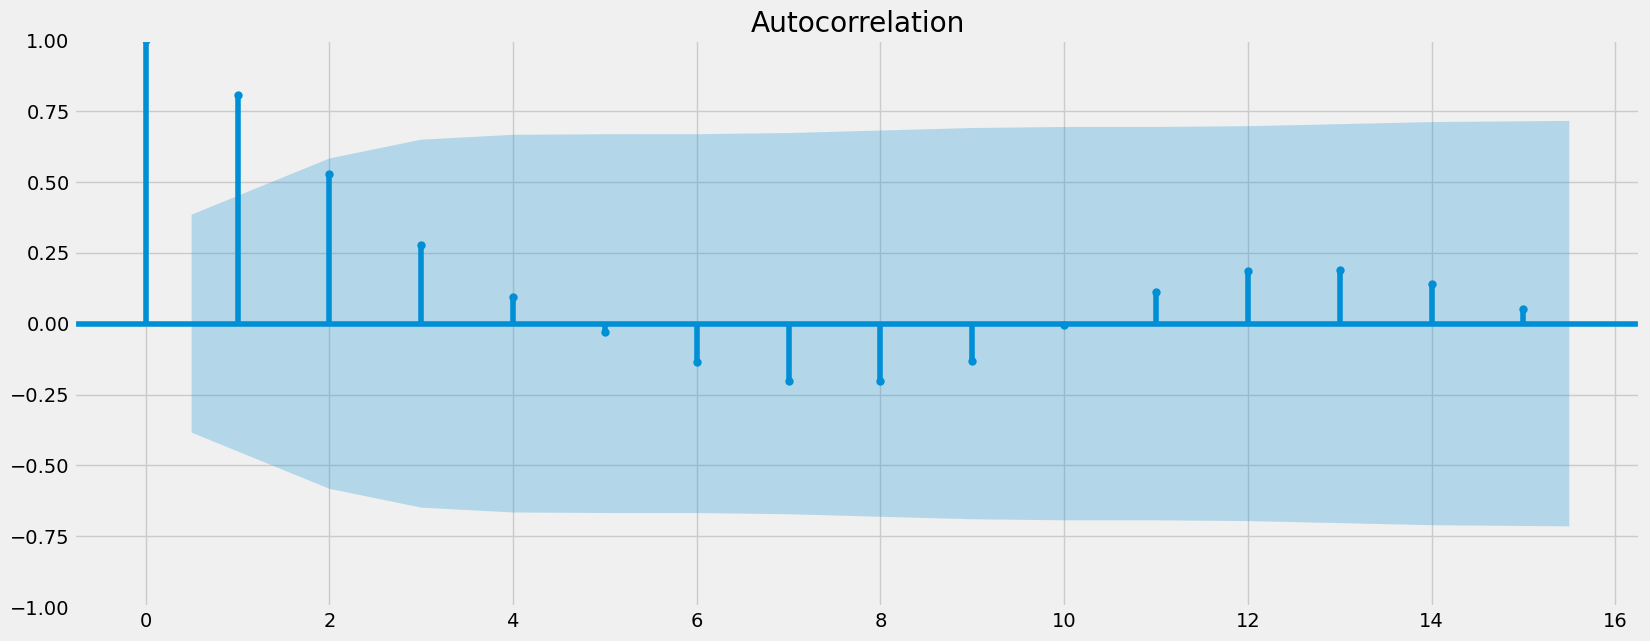

<Figure size 1500x500 with 0 Axes>

In [58]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff_3)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

#### We have 2 significant autocorrelations here
#### we can take q = 1.(starting with a conservative approach) 

### 2. Splitting the Data

In [59]:
# Define the size of the training and testing sets
train_size = int(len(monthly_data) * 0.8)  # 80% of the data for training
test_size = len(monthly_data) - train_size  # remaining 20% for testing

# Split the data into training and testing sets
train_data = monthly_data.iloc[:train_size]
test_data = monthly_data.iloc[train_size:]


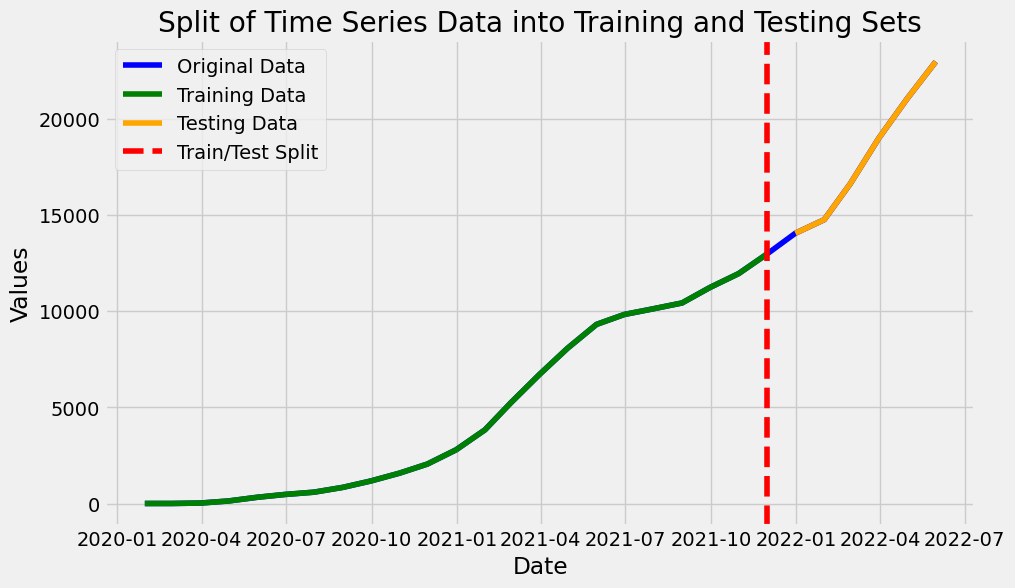

In [60]:
# Optionally, visualize the split
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(monthly_data.index, monthly_data.values, label='Original Data', color='blue')

# Plot the training data
plt.plot(train_data.index, train_data.values, label='Training Data', color='green')

# Plot the testing data
plt.plot(test_data.index, test_data.values, label='Testing Data', color='orange')

# Add a vertical dashed line to indicate the train/test split
plt.axvline(train_data.index[-1], color='red', linestyle='--', label='Train/Test Split')

plt.title('Split of Time Series Data into Training and Testing Sets')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.savefig('covid_cases_Testing_data.png')
plt.show()


### run and fit model

In [61]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [62]:
from statsmodels.tsa.arima_model import ARMA

In [63]:
# Forecast
forecast_steps = len(test_data)  # Number of steps ahead to forecast
fc = fitted.forecast(steps=forecast_steps)  # Forecast values

# Get forecast confidence intervals
forecast_confidence = fitted.get_forecast(steps=forecast_steps, alpha=0.05)  # 95% confidence interval

# Extract lower and upper bounds of the confidence interval
conf_int = forecast_confidence.conf_int()
lower_series = conf_int.iloc[:, 0]
upper_series = conf_int.iloc[:, 1]



# Make into pandas series
fc_series = pd.Series(fc, index=test_data.index)  # Forecast series

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)  # Confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: name 'fitted' is not defined

### Iterating with multiple p, d and q values

In [ ]:
model = ARIMA(train_data, order=(7,5,9))  # Replace p, d, and q with appropriate values
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test_data)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(fc - conf, index=test_data.index)
upper_series = pd.Series(fc + conf, index=test_data.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### The coefficients lack significance, indicated by a p-value exceeding 0.05. It's worth noting that the forecasting line closely aligns with the actual data line.